# import

In [19]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline, make_pipeline

import matplotlib.pyplot as plt
from joblib import Parallel, delayed

%matplotlib inline

# plotting elbow chart

In [13]:
pca = make_pipeline(
    StandardScaler(), 
    PCA(n_components=15) # PCAで次元削減をする場合には予め平行分析でパラメータを決めておく。
)
d_pca = pca.fit_transform(d)

In [ ]:
def get_km_distortion(k, X):
    km = KMeans(n_clusters=k, random_state=0, n_jobs=-1)
    km.fit(X)
    return km.inertia_

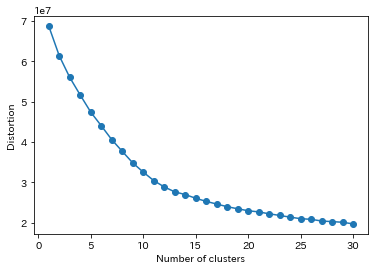

In [22]:
k = 30

elbow = Parallel(n_jobs=-1)([delayed(get_km_distortion)(k, d_pca) for k in range(1, k+1)])
plt.plot(range(1, k+1), elbow, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()